In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder

In [22]:
dataset = pd.read_excel('../data/boxScores.xlsx')

In [23]:
dataset = dataset[dataset['MIN'] != 0]
dataset = dataset.dropna(subset=['W/L'])
dataset.describe()

,GAME DATE,MIN,PTS,FGM,FGA,3PM,3PA,FTM,FTA,OREB,...,STL,BLK,TOV,PF,+/-,FP,Last3_FP_Avg,Last5_FP_Avg,Last7_FP_Avg,Season_FP_Avg
count,10112,10112.000000,10112.000000,10112.000000,10112.000000,10112.000000,10112.000000,10112.000000,10112.000000,10112.000000,...,10112.000000,10112.000000,10112.000000,10112.000000,10112.000000,10112.000000,9601.000000,9601.000000,9601.000000,9601.000000
mean,2024-11-23 01:25:52.215189760,22.478046,10.526899,3.835641,8.264438,1.259593,3.502868,1.596025,2.048161,1.014834,...,0.785403,0.479430,1.314181,1.786392,-0.000692,21.590655,21.648995,21.555911,21.483699,21.171419
min,2024-10-22 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-43.000000,-3.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2024-11-06 00:00:00,14.000000,4.000000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,-7.000000,9.700000,11.700000,11.900000,11.885714,11.666667
50%,2024-11-22 00:00:00,24.000000,9.000000,3.000000,7.000000,1.000000,3.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,2.000000,0.000000,19.800000,20.266667,20.200000,20.085714,19.850000
75%,2024-12-08 00:00:00,31.000000,16.000000,6.000000,12.000000,2.000000,5.000000,2.000000,3.000000,2.000000,...,1.000000,1.000000,2.000000,3.000000,7.000000,31.200000,30.000000,29.840000,29.614286,29.108333
max,2024-12-29 00:00:00,48.000000,60.000000,22.000000,39.000000,10.000000,20.000000,17.000000,26.000000,12.000000,...,8.000000,10.000000,10.000000,6.000000,43.000000,98.300000,80.500000,75.360000,72.200000,72.200000
std,NaN,10.845819,8.809586,3.232476,6.030802,1.536217,3.171489,2.245024,2.712615,1.346496,...,1.001350,0.843841,1.451720,1.451508,11.333723,14.976427,13.077532,12.690014,12.530303,12.270331


In [24]:
clusterdf = pd.read_excel('../data/clusteredPlayers.xlsx')

In [25]:
clusterdf = clusterdf.drop('Unnamed: 0', axis=1)
clusterdf.head()

,Player,Cluster
0,Anthony Black,12
1,Kentavious Caldwell-Pope,9
2,Bennedict Mathurin,13
3,Clint Capela,4
4,De'Aaron Fox,1


In [26]:
clusterDict = {}

In [27]:
# Map the 'Cluster' column from clusterdf to the dataset based on 'Player'
clusterDict = clusterdf.set_index('Player')['Cluster'].to_dict()

# Map the 'CLUSTER' column in the dataset
dataset['CLUSTER'] = dataset['PLAYER'].map(clusterDict)

In [28]:
# Remove players without a cluster
dataset = dataset.dropna(subset=['CLUSTER'])
dataset.sort_values(by=['GAME DATE'], ascending = [False], inplace=True)

In [29]:
dataset.describe()


,GAME DATE,MIN,PTS,FGM,FGA,3PM,3PA,FTM,FTA,OREB,...,BLK,TOV,PF,+/-,FP,Last3_FP_Avg,Last5_FP_Avg,Last7_FP_Avg,Season_FP_Avg,CLUSTER
count,7683,7683.000000,7683.000000,7683.000000,7683.000000,7683.000000,7683.000000,7683.000000,7683.000000,7683.000000,...,7683.000000,7683.000000,7683.000000,7683.000000,7683.000000,7385.000000,7385.000000,7385.000000,7385.000000,7683.000000
mean,2024-11-23 02:16:04.310816256,26.421320,12.698035,4.618899,9.904074,1.521281,4.191592,1.938956,2.466484,1.161135,...,0.553169,1.557074,2.043603,0.188468,25.731004,25.614999,25.534631,25.471709,25.138309,7.602889
min,2024-10-22 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-43.000000,-2.800000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2024-11-06 00:00:00,20.000000,6.000000,2.000000,6.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,-8.000000,15.200000,16.933333,17.100000,17.200000,16.968182,4.000000
50%,2024-11-22 00:00:00,27.000000,11.000000,4.000000,9.000000,1.000000,4.000000,1.000000,2.000000,1.000000,...,0.000000,1.000000,2.000000,0.000000,24.400000,24.166667,24.160000,24.066667,23.638889,8.000000
75%,2024-12-08 00:00:00,33.000000,18.000000,7.000000,13.000000,2.000000,6.000000,3.000000,4.000000,2.000000,...,1.000000,2.000000,3.000000,8.000000,34.500000,32.933333,32.520000,32.366667,31.900000,11.000000
max,2024-12-29 00:00:00,48.000000,60.000000,22.000000,39.000000,10.000000,20.000000,17.000000,26.000000,12.000000,...,10.000000,10.000000,6.000000,43.000000,98.300000,80.500000,75.360000,72.200000,72.200000,14.000000
std,NaN,8.579712,8.729582,3.207729,5.795979,1.614955,3.221009,2.394082,2.873768,1.419382,...,0.900333,1.516022,1.432886,12.315903,14.165707,11.891585,11.401002,11.189650,10.885811,4.273387


In [30]:
featureNames = ['Last3_FP_Avg', 'Last5_FP_Avg', 'Last7_FP_Avg', 'Season_FP_Avg', 'CLUSTER']
labelName = ['FP']
dfFeatures = dataset[featureNames]
dfLabels = dataset[labelName]
# Ensures Cluster is a categorical variable 
dfFeatures = pd.get_dummies(dfFeatures, columns=['CLUSTER'], drop_first=False)
print(dfFeatures.head())


      Last3_FP_Avg  Last5_FP_Avg  Last7_FP_Avg  Season_FP_Avg  CLUSTER_0.0  \
6746     18.500000         14.72     17.671429      16.864000        False   
7491     29.966667         26.38     24.657143      26.624000        False   
7439     22.800000         19.92     19.528571      23.806667        False   
4332     32.433333         32.44     32.442857      40.970000        False   
171      23.866667         16.78     14.000000      12.650000        False   

      CLUSTER_1.0  CLUSTER_2.0  CLUSTER_3.0  CLUSTER_4.0  CLUSTER_5.0  \
6746        False        False        False         True        False   
7491        False        False        False        False        False   
7439        False         True        False        False        False   
4332         True        False        False        False        False   
171         False        False        False        False        False   

      CLUSTER_6.0  CLUSTER_7.0  CLUSTER_8.0  CLUSTER_9.0  CLUSTER_10.0  \
6746        False 

In [31]:
labels = np.array(dfLabels)
features = np.array(dfFeatures)

In [32]:
dataset = dataset[['PLAYER', 'GAME DATE', 'FP', 'Last3_FP_Avg', 'Last5_FP_Avg', 'Last7_FP_Avg', 'Season_FP_Avg', 'CLUSTER']]
players = dataset['PLAYER']
gameDates = dataset['GAME DATE']

In [33]:
print(f"Initial dataset shape: {dataset.shape}")
train, test, trainLabels, testLabels, trainPlayers, testPlayers, trainDates, testDates= train_test_split(features, labels, players, gameDates, test_size=0.25, random_state=30)
testPlayers = testPlayers.reset_index(drop=True)
testDates = testDates.reset_index(drop=True)
print(f"Dataset shape after dropna: {dataset.shape}")

Initial dataset shape: (7683, 8)
Dataset shape after dropna: (7683, 8)


In [34]:
import pickle
rf = RandomForestRegressor(
    random_state=4,
)
rf.fit(train, trainLabels)

with open("../models/RFCluster.sav", 'wb') as f:
    pickle.dump(rf, f)

c:\Users\Ian Bracken\Desktop\WebDev\nba-prediction-model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [35]:
train_predictions = rf.predict(train)
predictions = rf.predict(test)


In [36]:
# Create a mapping from one-hot encoded columns back to cluster numbers
cluster_columns = [col for col in dfFeatures.columns if col.startswith('CLUSTER_')]
reverse_cluster_map = {i: col.split('_')[-1] for i, col in enumerate(cluster_columns, start=1)}

In [37]:
feature_columns = dfFeatures.columns
df = pd.DataFrame(test, columns = feature_columns)
# Add back a 'CLUSTER' column to your DataFrame after predictions
df['CLUSTER'] = df[cluster_columns].idxmax(axis=1)  # Get the column with the highest value (1 in this case)
df['CLUSTER'] = df['CLUSTER'].map(lambda x: float(x.split('_')[-1]))  # Map back to the original cluster numbers

# Drop the one-hot encoded columns if no longer needed
df = df.drop(columns=cluster_columns)
df['PLAYER'] = testPlayers
df['GAME DATE'] = testDates
df['Actual'] = testLabels
df['Predicted'] = predictions
df['Error'] = abs(df['Actual'] - df['Predicted'])
df = df[['PLAYER'] + [col for col in df.columns if col != 'PLAYER']]

In [38]:
df.describe()

,CLUSTER,GAME DATE,Actual,Predicted,Error
count,1921.000000,1921,1921.000000,1921.000000,1921.000000
mean,7.598126,2024-11-22 22:29:17.834461184,26.520354,25.848590,8.581014
min,0.000000,2024-10-22 00:00:00,-2.000000,4.784000,0.003000
25%,4.000000,2024-11-06 00:00:00,15.800000,17.810000,3.384000
50%,9.000000,2024-11-22 00:00:00,25.100000,24.253000,7.223000
75%,11.000000,2024-12-08 00:00:00,35.600000,31.938833,12.476000
max,14.000000,2024-12-29 00:00:00,85.200000,67.980000,40.137000
std,4.281364,NaN,14.267317,10.462865,6.644791


In [39]:
df.head()

,PLAYER,Last3_FP_Avg,Last5_FP_Avg,Last7_FP_Avg,Season_FP_Avg,CLUSTER,GAME DATE,Actual,Predicted,Error
0,Jaden Ivey,26.2,29.58,30.128571,30.128571,12.0,2024-11-04,38.8,25.57500,13.22500
1,Luguentz Dort,NaN,NaN,NaN,NaN,14.0,2024-10-24,19.4,15.38054,4.01946
2,Stephon Castle,20.866667,25.0,26.814286,22.25,12.0,2024-12-06,33.1,23.60100,9.49900
3,Keaton Wallace,12.733333,10.28,12.885714,12.216667,11.0,2024-12-21,9.2,11.39800,2.19800
4,Isaiah Joe,19.033333,14.7,14.066667,14.066667,14.0,2024-11-04,19.3,13.23700,6.06300


In [40]:
pd.DataFrame.to_excel(df, '../data/testPlayerPredictions.xlsx')

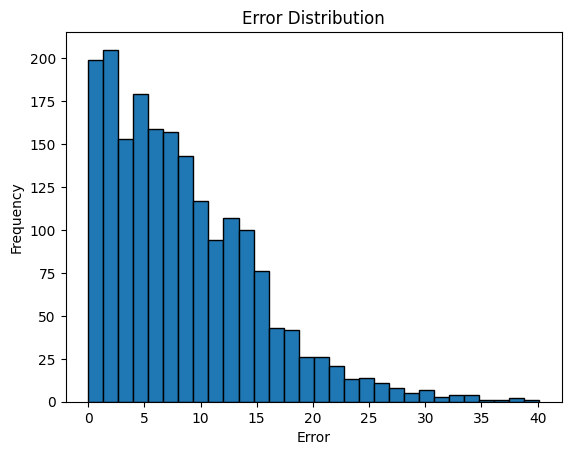

In [41]:
import matplotlib.pyplot as plt

plt.hist(df['Error'], bins=30, edgecolor='k')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Distribution')
plt.show()

In [42]:
# Identfy unique list of cluster to loop over
clusterdf.head()

,Player,Cluster
0,Anthony Black,12
1,Kentavious Caldwell-Pope,9
2,Bennedict Mathurin,13
3,Clint Capela,4
4,De'Aaron Fox,1


In [43]:
clusterList = clusterdf['Cluster'].tolist()

In [44]:
uniqueClusterList = list(set(clusterList))
uniqueClusterList

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [45]:
# ClusterError = 0
# for cluster in uniqueClusterList:
#     clusterdf = dataset[dataset['CLUSTER'] == cluster]
#     dfFeatures = clusterdf[['Last3_FP_Avg', 'Last5_FP_Avg', 'Last7_FP_Avg', 'Season_FP_Avg']]
#     dfLabels = clusterdf[['FP']]

#     labels = np.array(dfLabels).ravel()
#     features = np.array(dfFeatures)

#     train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.25, random_state=4)

#     reg = RandomForestRegressor(random_state=4)
#     reg.fit(train, train_labels)

#     train_predictions = reg.predict(train)
#     predictions = reg.predict(test)

#     df0 = pd.DataFrame(test, columns = ['Last3_FP_Avg', 'Last5_FP_Avg', 'Last7_FP_Avg', 'Season_FP_Avg'])
#     df0['Actual'] = test_labels
#     df0['Predicted'] = predictions
#     df0['Error'] = abs(df0['Actual'] - df0['Predicted'])
#     ClusterError += df0['Error'].mean()

#     print(f"Cluster {cluster} average error is roughly {df0['Error'].mean()}")
# avgClusterError = ClusterError/len(uniqueClusterList)
# print(f"Average error across clusters is: {avgClusterError}")